
## This notebook uses the data from  Joint Light Curve Analysis (JLA) of the SDSS-II and SNLS supernova samples Betoule et al. (2014). to estimate a value for hubble constant using various method


## equation that will be needed
### code in this cell copied from SupplementaryNotebookRW2020(Louise Dash, Ben Waugh)
Equation (1):
$$ v = H_0 D $$ 

Equation (2): 
$$ w_i = \frac{1}{(\Delta y_i)^2} $$

Equations (3,4): 
$$  m = \frac{\sum_i w_i \sum_i w_i x_i y_i - \sum_i w_i x_i \sum_i w_i
y_i}{\sum_i w_i \sum_i w_i x_i^2 - \left(\sum_i w_i x_i \right)^2}\\
= \frac{\sum_i w_i \sum_i w_i x_i y_i - \sum_i w_i x_i \sum_i w_i
y_i}{\delta} $$
    
Equation (5):
$$ c = \frac{\sum_i w_i x_i^2 \sum_i w_i y_i - \sum_i w_i x_i \sum_i w_i x_i y_i}{\delta} $$

Equation (6):
$$ \delta = \sum_i w_i \sum_i w_i x_i^2 - \left(\sum_i w_i x_i \right)^2 $$

Equation (7): 
$$ \Delta m = \sqrt{ \frac{\sum_i w_i}{\delta}} $$

Equation (8):
$$ \Delta c = \sqrt{ \frac{\sum_i x_i^2 w_i}{\delta}} $$

## (1)

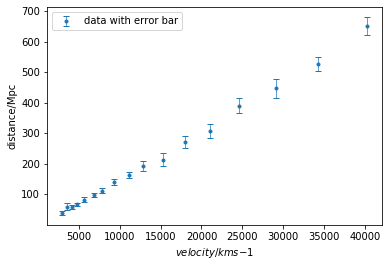

In [1]:
import numpy as np
import matplotlib.pyplot as plt

##import data file
velocity,distance,error_distance=np.loadtxt("hubble_data.csv",delimiter=',',skiprows=0,unpack=True) 
##plot the unweighted data with error bar
plt.errorbar(velocity,distance,yerr=error_distance/2,fmt='.',label='data with error bar',
            elinewidth=0.7,capsize=3)
## add labels
plt.xlabel('$velocity/kms{-1}$')  
plt.ylabel('distance/Mpc')
plt.legend(loc=2) ## legend location



## (2)
### using Lemaitre's procudure with Equation(x) to calculate an estimation of Hubble's constant with unweighted and weighted data 

## (a)
### according to the equation 𝑣=𝐻0𝐷, making D for y-value, D=𝑣/H0, the gradient of best fit line is the reciprocal of Hubble's constant


In [82]:
## code of the function is adapted from my task 5 assignment
from math import sqrt
def unweighted_fitting(x,y):
    meanx=np.mean(x)
    meany=np.mean(y)
    m= np.sum(((x-meanx)*y)/np.sum((x-meanx)**2)) #calculate the slope
    c= meany-meanx*m #calculate the intercept
    # to sum up S and D according to the equation
    S=np.sum((y-m*x-c)**2)
    D=np.sum((x-meanx)**2)

    # calculate the error for m and c   
    error_m=sqrt(S/((len(x)-2)*D))
    error_c=sqrt((1/(len(x))+meanx**2/D)*(S/(len(x)-2)))
    
    fitx=np.linspace(x[0],x[-1],len(x)-1) #set an array of x value according to the array passed to the function
    fity=np.array(c+fitx*m)   #set an array for y value for the best fit line 
    
    plt.plot(fitx,fity,label='best fit line')    #plot the best fit line
    plt.legend()

    #then output the calculated value
    print(f"the best fit line has slope \n{m:0} ±{error_m:0} Mpc s kmˆ-1 \nand intercept \n{c:0} ±{error_c:0} Mpc",)
    print('\n')
    print( f"The equation of the best fit line is: y = ({m:0.2} ± {error_m:0.1})x + ({c:0.2} ± {error_c:0.1})")
    return  (m,error_m,c,error_c) #return the calculated value in case they are needed
   
    


the best fit line has slope 
0.015979397311965605 ±0.00022065881058272276 Mpc s kmˆ-1 
and intercept 
-11.624040905828451 ±4.078725830535065 Mpc


The equation of the best fit line is: y = (0.016 ± 0.0002)x + (-1.2e+01 ± 4e+00)


(0.015979397311965605,
 0.00022065881058272276,
 -11.624040905828451,
 4.078725830535065)

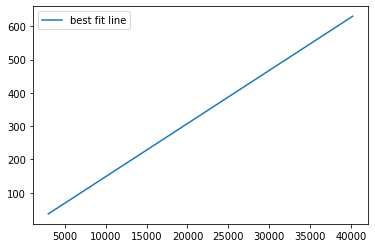

In [83]:
unweighted_fitting(velocity,distance) ## call the function using data from file

## (b)

#### below is a function that consider the weight of each data and calculate the corresponding fit line using 
Equation (2): 
$$ w_i = \frac{1}{(\Delta y_i)^2} $$

Equations (3,4): 
$$  m = \frac{\sum_i w_i \sum_i w_i x_i y_i - \sum_i w_i x_i \sum_i w_i
y_i}{\sum_i w_i \sum_i w_i x_i^2 - \left(\sum_i w_i x_i \right)^2}\\
= \frac{\sum_i w_i \sum_i w_i x_i y_i - \sum_i w_i x_i \sum_i w_i
y_i}{\delta} $$
    
Equation (5):
$$ c = \frac{\sum_i w_i x_i^2 \sum_i w_i y_i - \sum_i w_i x_i \sum_i w_i x_i y_i}{\delta} $$

Equation (6):
$$ \delta = \sum_i w_i \sum_i w_i x_i^2 - \left(\sum_i w_i x_i \right)^2 $$

Equation (7): 
$$ \Delta m = \sqrt{ \frac{\sum_i w_i}{\delta}} $$

Equation (8):
$$ \Delta c = \sqrt{ \frac{\sum_i x_i^2 w_i}{\delta}} $$

In [87]:
def weighted_fitting(x,y,error):
    wi=np.array(1/(error)**2)
    delta=(np.sum(wi))*(np.sum(wi*x**2))-(np.sum(wi*x))**2
    m=((np.sum(wi))*(np.sum(wi*x*y))-(np.sum(wi*y))*(np.sum(wi*y)))/delta
    c=((np.sum(wi*x**2))*(np.sum(wi*y))-(np.sum(wi*x))*(np.sum(wi*x*y)))/delta
    
    